# Produces a plot of a*ZQCDjj xSection

In [1]:
from uncertainties import ufloat
import numpy as np

aSherpa = {'Zmumu':ufloat(1.012,0.015),'Zee':ufloat(0.968,0.016),'Ztautau':ufloat(1.084,0.05)}
aMG = {'Zmumu':ufloat(0.991,0.014),'Zee':ufloat(1.013,0.016),'Ztautau':ufloat(1.132,0.06)}

def delete_module(modname, paranoid=None):
    from sys import modules
    try:
        thismod = modules[modname]
    except KeyError:
        raise ValueError(modname)
    these_symbols = dir(thismod)
    if paranoid:
        try:
            paranoid[:]  # sequence support
        except:
            raise ValueError('must supply a finite list for paranoid')
        else:
            these_symbols = paranoid[:]
    del modules[modname]
    for mod in modules.values():
        try:
            delattr(mod, modname)
        except AttributeError:
            pass
        if paranoid:
            for symbol in these_symbols:
                if symbol[:2] == '__':  # ignore special symbols
                    continue
                try:
                    delattr(mod, symbol)
                except AttributeError:
                    pass


In [2]:
import sys
sys.path.append('/Users/diegomac/Documents/HEP/VBF-Analysis/MuMu/MC/backend/')
from infofile import infos

def extractXsec(infos,keyword):
    xSec= [infos[i]['xsec']*infos[i]['fil_eff']*infos[i]['kfac'] for i in infos if (keyword in i and '2018' in i and 'VBF' not in i)] 
    xSecCorrected = []
    for i in xSec:
        if i not in xSecCorrected:
            xSecCorrected.append(i)
    print(len(xSecCorrected))
    return sum(xSecCorrected)
    
xSecSherpa ={'Zmumu':0.0,'Zee':0.0,'Ztautau':0.0}    
xSecMG ={'Zmumu':0.0,'Zee':0.0,'Ztautau':0.0}    

xSecSherpa['Zmumu'] = extractXsec(infos,'Zmumu_sherpa')
xSecMG['Zmumu'] = extractXsec(infos,'Zmumu_MG')

print(len(infos))

delete_module('infofile')

sys.path.remove('/Users/diegomac/Documents/HEP/VBF-Analysis/MuMu/MC/backend/')

sys.path.append('/Users/diegomac/Documents/HEP/VBF-Analysis/Zee/MC/backend/')
from infofile import infos as infoss

print(len(infoss))

xSecSherpa['Zee'] = extractXsec(infoss,'Zee_sherpa')
xSecMG['Zee'] = extractXsec(infoss,'Zee_MG')

delete_module('infofile')

sys.path.remove('/Users/diegomac/Documents/HEP/VBF-Analysis/Zee/MC/backend/')

sys.path.append('/Users/diegomac/Documents/HEP/VBF-Analysis/TauMu/MC/backend/')
from infofile import infos

print(len(infos))

xSecSherpa['Ztautau'] = extractXsec(infos,'Ztautau_sherpa')
xSecMG['Ztautau'] = extractXsec(infos,'Ztautau_MG')


14
24
883
858
14
24
776
14
5


In [3]:
print(xSecMG,xSecSherpa)

{'Zmumu': 2105.5729978898535, 'Zee': 2116.724794784552, 'Ztautau': 2098.4764416} {'Zmumu': 2088.906357884409, 'Zee': 2091.2893703377777, 'Ztautau': 2082.744817005707}


In [4]:
for i in aSherpa:
    aSherpa[i] = aSherpa[i]*xSecSherpa[i]

for i in aMG:
    aMG[i] = aMG[i]*xSecMG[i]
    
def weightedAverage(value1,value2):
    inverseStdDev = 1/(value1.std_dev)**2 + 1/(value2.std_dev)**2
    average = (value1.nominal_value/(value1.std_dev)**2 + value2.nominal_value/(value2.std_dev)**2)/inverseStdDev
    return ufloat(average,np.sqrt(1/inverseStdDev))

average = {}
for i in aSherpa:
    average[i] = weightedAverage(aSherpa[i],aMG[i])

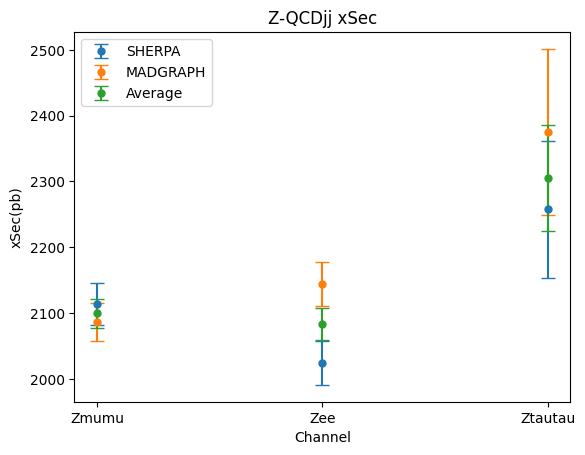

In [7]:
import matplotlib.pyplot as plt

# define the categories for the x-axis
categories = ['Zmumu', 'Zee','Ztautau']

# define the data for the y-axis
sherpa = [aSherpa['Zmumu'].nominal_value, aSherpa['Zee'].nominal_value,aSherpa['Ztautau'].nominal_value]  # the mean value for each category
sherpaErrors = [aSherpa['Zmumu'].std_dev, aSherpa['Zee'].std_dev,aSherpa['Ztautau'].std_dev]  # the standard deviation for each category

MG = [aMG['Zmumu'].nominal_value, aMG['Zee'].nominal_value,aMG['Ztautau'].nominal_value]  # the mean value for each category
MGErrors = [aMG['Zmumu'].std_dev, aMG['Zee'].std_dev,aMG['Ztautau'].std_dev]  # the standard deviation for each category

averageValue = [average['Zmumu'].nominal_value, average['Zee'].nominal_value,average['Ztautau'].nominal_value]  # the mean value for each category
averageErrors = [average['Zmumu'].std_dev, average['Zee'].std_dev,average['Ztautau'].std_dev]  # the standard deviation for each category


# create a figure and axes object
fig, ax = plt.subplots()

# plot the means as points and the errors as error bars
ax.errorbar(categories, sherpa, yerr=sherpaErrors, fmt='o', capsize=5, capthick=1, markersize=5)
ax.errorbar(categories, MG, yerr=MGErrors, fmt='o', capsize=5, capthick=1, markersize=5)

ax.errorbar(categories, averageValue, yerr=averageErrors, fmt='o', capsize=5, capthick=1, markersize=5)

# set the title and axis labels
ax.set_title('Z-QCDjj xSec')
ax.set_xlabel('Channel')
ax.set_ylabel('xSec(pb)')

plt.legend(['SHERPA','MADGRAPH', 'Average'])

# display the plot
plt.show()